<a href="https://colab.research.google.com/github/Bunnybunny1120/Master_Thesis_2023/blob/main/Feature_Selection_22_June.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Building pipeline code derived from:  https://www.freecodecamp.org/news/machine-learning-pipeline/**

Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVR
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from scipy.stats import randint, uniform
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from scipy.stats import sem
import seaborn as sns
##visualize Pipeline
from sklearn import set_config
set_config(display="diagram")
import warnings
#suppress warnings
warnings.filterwarnings('ignore')

We will use the SVR with Median Imputation method to conduct feature permutation and feature selection




Importing data

In [ ]:

df_no_impu = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/no_imput_june2.csv')
df_version1 = df_no_impu.loc[:, ['Winkler_DO', 'Temp','Total_Phosphorus', 'BOD5', 'PH', 'Top_Chlorophyll_A']]
df_version1 = df_version1.dropna()
df_version1_impu =df_no_impu.iloc[df_version1.index, :]
print('manual feature slection of 5 features shape incl target:', df_version1.shape)
df_version1 = df_version1_impu.dropna(axis = 1)
print('no imputation with factual data  given the selected rows incl target', df_version1.shape)

df_version1_impu =df_no_impu.iloc[df_version1.index, :]
print('imputation with all columns incl target:', df_version1_impu.shape)

x = df_version1_impu.drop('Top_Chlorophyll_A', axis = 1)
y = df_version1_impu['Top_Chlorophyll_A']
print('dataset with imputation shape, excluding target', x.shape)
print('target shape', y.shape)

# Split the data into train80%, and test sets 20%
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

manual feature slection of 5 features shape incl target: (1572, 6)
no imputation with factual data  given the selected rows incl target (1572, 10)
imputation with all columns incl target: (1572, 33)
dataset with imputation shape, excluding target (1572, 32)
target shape (1572,)


Spliting data into training 80% and test 20%

In [ ]:
df_version1_impu.columns

Index(['Site_Depth', 'Secchi_Depth', 'Top_Turbidity', 'Light_Trans',
       'Conductivity', 'Salinity', 'Fluorometer', 'Top_PARR', 'Top_Par',
       'Current_Speed', 'Wind_Speed', 'Sea_State', 'Temp', 'Top_Nitrate',
       'Top_Ammonium', 'Total_Phosphorus', 'Top_Silica', 'Top_DOC',
       'Winkler_DO', 'ORP', 'O2', 'CTD_PH', 'PH', 'TSS', 'BOD5', 'BOD_Oakwood',
       'Coliform', 'Top Enterococci', 'Top_FeCo', 'Wind_Direction',
       'Current_Direction', 'Weather', 'Top_Chlorophyll_A'],
      dtype='object')

# **Median Imputation Preprocessor**

In [ ]:

numeric_processor=Pipeline(
    steps=[("imputation_median", SimpleImputer(missing_values=np.nan, strategy= "median")),
          ("scaler", StandardScaler())])

categorical_processor=Pipeline(
    steps=[("imputation_consatnt", SimpleImputer(fill_value="missing", strategy= "constant")),
          ("onehot", OneHotEncoder(handle_unknown= "ignore"))])

## combine processing technqiues
preprocessor = ColumnTransformer(
    [("categorical", categorical_processor,['Wind_Direction', 'Current_Direction',
                                            'Weather']),
    ("numerical", numeric_processor,['Site_Depth', 'Secchi_Depth', 'Top_Turbidity',
                                     'Light_Trans', 'Conductivity', 'Salinity',
                                     'Fluorometer', 'Top_PARR', 'Top_Par',
                                     'Current_Speed', 'Wind_Speed', 'Sea_State',
                                     'Temp', 'Top_Nitrate', 'Top_Ammonium',
                                     'Total_Phosphorus', 'Top_Silica',
                                     'Top_DOC', 'Winkler_DO', 'ORP', 'O2', 'CTD_PH',
                                     'PH', 'TSS', 'BOD5', 'BOD_Oakwood', 'Coliform',
                                     'Top Enterococci', 'Top_FeCo'])])


# **Baseline Random Forest with Median imputation**

## **SVR Median imputation**

In [ ]:
pipe_SVR = make_pipeline(preprocessor, SVR())
pipe_SVR

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_consatnt',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Wind_Direction',
                                                   'Current_Direction',
                                                   'Weather']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_median',
                                                                   SimpleImputer(stra...
                                                  ['Site_Depth', 'Secchi_Depth',
                                                   'Top_Turbidity',
                                                   'Light_Trans',
                                                   'Conductivity', 'Salinity',
                                                   'Fluorometer', 'Top_PARR',
                                                   'Top_Par', 'Current_Speed',
                                                   'Wind_Speed', 'Sea_State',
                                                   'Temp', 'Top_Nitrate',
                                                   'Top_Ammonium',
                                                   'Total_Phosphorus',
                                                   'Top_Silica', 'Top_DOC',
                                                   'Winkler_DO', 'ORP', 'O2',
                                                   'CTD_PH', 'PH', 'TSS',
                                                   'BOD5', 'BOD_Oakwood',
                                                   'Coliform',
                                                   'Top Enterococci',
                                                   'Top_FeCo'])])),
                ('svr', SVR())])

Best hyperparameters: {'svr__C': 80.22653822840017, 'svr__degree': 5, 'svr__epsilon': 1.1637301740168982, 'svr__gamma': 'scale', 'svr__kernel': 'rbf', 'svr__shrinking': False, 'svr__tol': 0.0005099450852813556}

SVR test Root Mean Squared Error: 9.594717814872007
SVR test Mean Absolute Error: 5.709204600832704
SVR test R-squared: 0.8042644259231778

SVR cross-validation mean R-squared: 0.8427420631219402 +/- 0.018253309283247223
SVR cross-validation mean RMSE: 9.826780571889753 +/- 0.6143158223301458
SVR cross-validation mean MAE: 6.15003910475666 +/- 0.2674838037465829


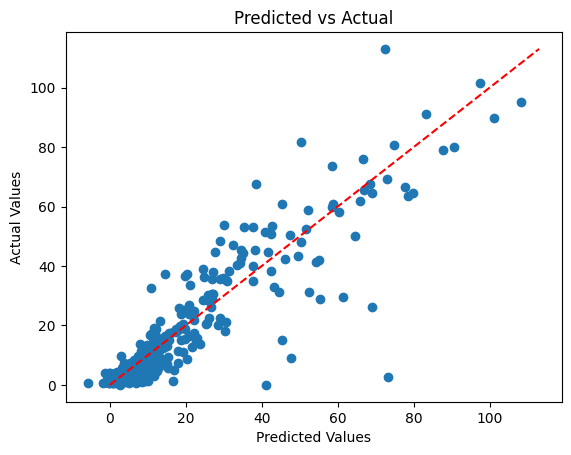

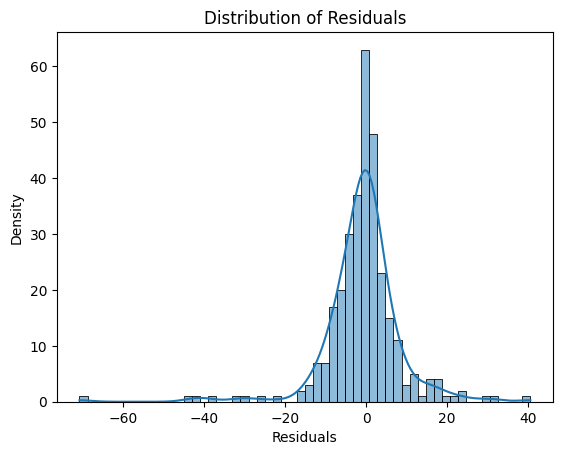

In [ ]:

# Define the parameter grid for random search
param_dist = {
    'svr__C': uniform(0.1, 100),
    'svr__kernel': ['linear', 'poly', 'rbf'],
    'svr__degree': randint(0, 6),
    'svr__epsilon': uniform(0.001, 10),
    'svr__gamma': ['scale', 'auto'],
    'svr__shrinking': [True, False],
    'svr__tol': uniform(1e-5, 1e-3),
}

# Perform random search with cross-validation on the training set
random_search = RandomizedSearchCV(pipe_SVR, param_distributions=param_dist, n_iter=5, cv=5, scoring='neg_mean_squared_error', random_state=12)
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print(f"Best hyperparameters: {random_search.best_params_}")

# Train the model with the best hyperparameters on the training set
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred_test = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print()
print(f"SVR test Root Mean Squared Error: {rmse_test}")
print(f"SVR test Mean Absolute Error: {mae_test}")
print(f"SVR test R-squared: {r2_test}")

# Evaluate the best model using cross-validation and report R2, RMSE, MAE, and STD
cv_r2_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
cv_rmse_scores = np.sqrt(-cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
cv_mae_scores = -cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

cv_r2_mean = np.mean(cv_r2_scores)
cv_rmse_mean = np.mean(cv_rmse_scores)
cv_mae_mean = np.mean(cv_mae_scores)

cv_r2_se = sem(cv_r2_scores)
cv_rmse_se = sem(cv_rmse_scores)
cv_mae_se = sem(cv_mae_scores)

print()
print(f"SVR cross-validation mean R-squared: {cv_r2_mean} +/- {cv_r2_se}")
print(f"SVR cross-validation mean RMSE: {cv_rmse_mean} +/- {cv_rmse_se}")
print(f"SVR cross-validation mean MAE: {cv_mae_mean} +/- {cv_mae_se}")

residuals = y_test - y_pred_test

# Plotting the predicted vs actual values
plt.scatter(y_pred_test, y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs Actual')
plt.show()

sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Distribution of Residuals')
plt.show()

Setting up SVR with best hyperparameters

In [ ]:
numeric_processor=Pipeline(
    steps=[("imputation_median", SimpleImputer(missing_values=np.nan, strategy= "median")),
          ("scaler", StandardScaler())])

categorical_processor=Pipeline(
    steps=[("imputation_consatnt", SimpleImputer(fill_value="missing", strategy= "constant")),
          ("onehot", OneHotEncoder(handle_unknown= "ignore"))])

## combine processing technqiues
preprocessor = ColumnTransformer(
    [("categorical", categorical_processor,['Wind_Direction', 'Current_Direction',
                                            'Weather']),
    ("numerical", numeric_processor,['Site_Depth', 'Secchi_Depth', 'Top_Turbidity',
                                     'Light_Trans', 'Conductivity', 'Salinity',
                                     'Fluorometer', 'Top_PARR', 'Top_Par',
                                     'Current_Speed', 'Wind_Speed', 'Sea_State',
                                     'Temp', 'Top_Nitrate', 'Top_Ammonium',
                                     'Total_Phosphorus', 'Top_Silica',
                                     'Top_DOC', 'Winkler_DO', 'ORP', 'O2', 'CTD_PH',
                                     'PH', 'TSS', 'BOD5', 'BOD_Oakwood', 'Coliform',
                                     'Top Enterococci', 'Top_FeCo'])])

pipe_SVR = make_pipeline(preprocessor, SVR())
# Best hyperparameters
best_params = {
    'svr__C': 80.22653822840017,
    'svr__degree': 5,
    'svr__epsilon': 1.1637301740168982,
    'svr__gamma': 'scale',
    'svr__kernel': 'rbf',
    'svr__shrinking': False,
    'svr__tol': 0.0005099450852813556
}

# Update pipeline with best hyperparameters
pipe_SVR.set_params(**best_params)
pipe_SVR

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_consatnt',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Wind_Direction',
                                                   'Current_Direction',
                                                   'Weather']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_median',
                                                                   SimpleImputer(stra...
                                                   'Top_Par', 'Current_Speed',
                                                   'Wind_Speed', 'Sea_State',
                                                   'Temp', 'Top_Nitrate',
                                                   'Top_Ammonium',
                                                   'Total_Phosphorus',
                                                   'Top_Silica', 'Top_DOC',
                                                   'Winkler_DO', 'ORP', 'O2',
                                                   'CTD_PH', 'PH', 'TSS',
                                                   'BOD5', 'BOD_Oakwood',
                                                   'Coliform',
                                                   'Top Enterococci',
                                                   'Top_FeCo'])])),
                ('svr',
                 SVR(C=80.22653822840017, degree=5, epsilon=1.1637301740168982,
                     shrinking=False, tol=0.0005099450852813556))])

Fluorometer: 0.2559666964535799 ± 0.02657636819580593
PH: 0.2074634519462661 ± 0.025081426276819436
Temp: 0.13346547329091493 ± 0.008659880683549458
Winkler_DO: 0.12257685345073108 ± 0.02577479414295884
BOD5: 0.10056852378951171 ± 0.012976241652950844
Total_Phosphorus: 0.08011887348434195 ± 0.01272179877509885
Salinity: 0.04487262868520494 ± 0.008403275599155626
Top_Nitrate: 0.025991206261919232 ± 0.0073058343686501475
O2: 0.019985761579158733 ± 0.007797213506409786
Wind_Direction: 0.0194764177313581 ± 0.004974648908733962
Top_Ammonium: 0.019074181139804712 ± 0.006586878391637726
Top_PARR: 0.01577930744817113 ± 0.008477207565461324
Secchi_Depth: 0.01474138291487329 ± 0.007327285067632481
Top_Par: 0.011833357574207426 ± 0.006213561420951845
Site_Depth: 0.011417235902311529 ± 0.006459315751302565
Wind_Speed: 0.01101698322068978 ± 0.01176400805926679
Conductivity: 0.010348074793548389 ± 0.005091530074962341
TSS: 0.008122885630178212 ± 0.0035037332442527797
Top_Turbidity: 0.008042266849404

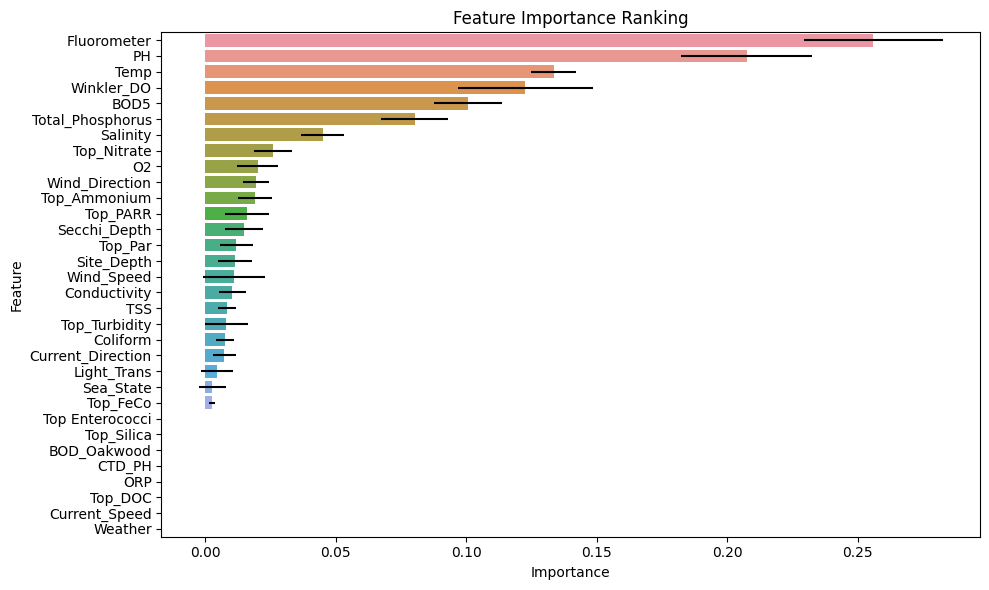

In [ ]:

pipe_SVR.fit(X_train, y_train)  # Replace X_train and y_train with your training data

# Perform feature permutation
result = permutation_importance(pipe_SVR, X_test, y_test, n_repeats=10, random_state=12)  # Replace X_test and y_test with your test data

# Get the feature importances and standard deviations
importances = result.importances_mean
importances_std = result.importances_std

# Get the feature names
feature_names = ['Site_Depth', 'Secchi_Depth', 'Top_Turbidity', 'Light_Trans',
       'Conductivity', 'Salinity', 'Fluorometer', 'Top_PARR', 'Top_Par',
       'Current_Speed', 'Wind_Speed', 'Sea_State', 'Temp', 'Top_Nitrate',
       'Top_Ammonium', 'Total_Phosphorus', 'Top_Silica', 'Top_DOC',
       'Winkler_DO', 'ORP', 'O2', 'CTD_PH', 'PH', 'TSS', 'BOD5', 'BOD_Oakwood',
       'Coliform', 'Top Enterococci', 'Top_FeCo', 'Wind_Direction',
       'Current_Direction', 'Weather']  # Update with your feature names

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature importances with standard deviations
for i in indices:
    print(f"{feature_names[i]}: {importances[i]} ± {importances_std[i]}")



# Create a dataframe with feature importances and names
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances, 'Std': importances_std})

# Sort the features by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances with standard deviations
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances_df, x='Importance', y='Feature', xerr=feature_importances_df['Std'], orient='h')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Ranking')
plt.tight_layout()
plt.show()






## **Feature selection**





Remove:
1.TSS,
2.Top_Turbidity,
3.Coliform,
4.Current_Direction,
5.Light_Trans,
6.Sea_State,
7.Top_FeCo,
8.Top Enterococci,
9.Top_Silica,
10.BOD_Oakwood,
11.Current_Speed,
12.CTD_PH,
13.ORP,
14.Top_DOC,
15.Weather,

In [ ]:

numeric_processor=Pipeline(
    steps=[("imputation_median", SimpleImputer(missing_values=np.nan, strategy= "median")),
          ("scaler", StandardScaler())])

categorical_processor=Pipeline(
    steps=[("imputation_consatnt", SimpleImputer(fill_value="missing", strategy= "constant")),
          ("onehot", OneHotEncoder(handle_unknown= "ignore"))])

## combine processing technqiues
preprocessor = ColumnTransformer(
    [("categorical", categorical_processor,['Wind_Direction']),
    ("numerical", numeric_processor,['Site_Depth', 'Secchi_Depth', 'Conductivity',
                                     'Salinity', 'Fluorometer', 'Top_PARR',
                                     'Top_Par', 'Wind_Speed', 'Temp', 'Top_Nitrate',
                                     'Top_Ammonium', 'Total_Phosphorus', 'Winkler_DO',
                                     'O2', 'PH', 'BOD5'])])

pipe_SVR = make_pipeline(preprocessor, SVR())
# Best hyperparameters
best_params = {
    'svr__C': 80.22653822840017,
    'svr__degree': 5,
    'svr__epsilon': 1.1637301740168982,
    'svr__gamma': 'scale',
    'svr__kernel': 'rbf',
    'svr__shrinking': False,
    'svr__tol': 0.0005099450852813556
}

# Update pipeline with best hyperparameters
best_model = pipe_SVR.set_params(**best_params)

best_model.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred_test = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print the rounded test evaluation metrics
print(f"SVR test R-squared: {round(r2_test, 3)}")
print(f"SVR test Root Mean Squared Error: {round(rmse_test, 3)}")
print(f"SVR test Mean Absolute Error: {round(mae_test, 3)}")
print()

# Evaluate the best model using cross-validation and report R2, RMSE, MAE, and STD
cv_r2_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
cv_rmse_scores = np.sqrt(-cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
cv_mae_scores = -cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

cv_r2_mean = np.mean(cv_r2_scores)
cv_rmse_mean = np.mean(cv_rmse_scores)
cv_mae_mean = np.mean(cv_mae_scores)

cv_r2_se = sem(cv_r2_scores)
cv_rmse_se = sem(cv_rmse_scores)
cv_mae_se = sem(cv_mae_scores)

print(f"SVR cross-validation mean R-squared: {round(cv_r2_mean, 3)} +/- {round(cv_r2_se, 3)}")
print(f"SVR cross-validation mean RMSE: {round(cv_rmse_mean, 3)} +/- {round(cv_rmse_se, 3)}")
print(f"SVR cross-validation mean MAE: {round(cv_mae_mean, 3)} +/- {round(cv_mae_se, 3)}")

SVR test R-squared: 0.817
SVR test Root Mean Squared Error: 9.288
SVR test Mean Absolute Error: 5.255

SVR cross-validation mean R-squared: 0.859 +/- 0.011
SVR cross-validation mean RMSE: 9.36 +/- 0.512
SVR cross-validation mean MAE: 5.737 +/- 0.192


Plot the residuals

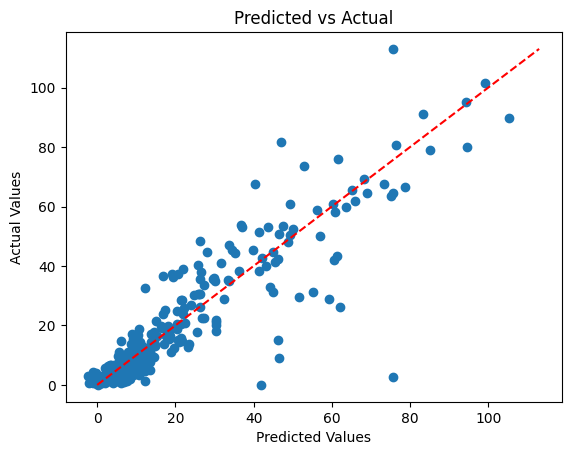

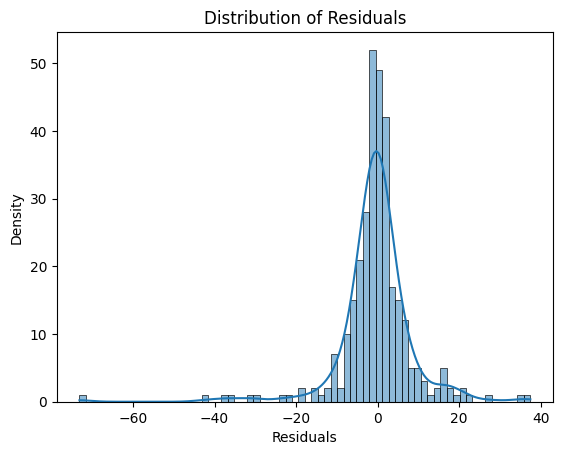

In [ ]:
residuals = y_test - y_pred_test

# Plotting the predicted vs actual values
plt.scatter(y_pred_test, y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs Actual')
plt.show()

sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Distribution of Residuals')
plt.show()